#### Problem Statement

#### The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.¶

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import csv file first
df=pd.read_csv("E:\\Data Science\\Data science Practise project\\abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['Sex'].value_counts()  # here sex is categorical data ,lets check count of each class

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

class 'M' has frequency 1528,class 'I' has frequency 1342 and class 'F' has frequency 1307

In [5]:
# lets check shape of dataframe
df.shape

(4177, 9)

### Here we have total 9 column, out of which first 8 columns are features and remaining last column 'Rings' is label.By observing label,we can see that categorical data is present, which clearly tell us, our problem is classification type

### dataframe consist of 4177 rows and 9 columns

In [6]:
df.isnull().sum()  # it shows 0 null value in our dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

All column shows o null value ,so no need of imputation techniques

In [7]:
# sometime space is present in dataset and it is considered as data ,so lets whether space is pesent in our dataset or not
df.loc[df['Sex']==" "]
df.loc[df['Length']==" "]
df.loc[df['Diameter']==" "]
df.loc[df['Height']==" "]
df.loc[df['Whole weight']==" "]
df.loc[df['Shucked weight']==" "]
df.loc[df['Viscera weight']==" "]
df.loc[df['Shell weight']==" "]
df.loc[df['Rings']==" "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Here we checked empty space for all columns Its good to see that no space or null value is present in our dataset,lets go for describe method


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Describe method cant show text data column'Sex'.We get stastical analysis of dataset, we get mean and standard deviation of each column, min and max shows minimum and maximum value of each column.25% denotes first quartle of data,50% denotes second quartile,and 75% denotes third quartile of dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### our dataset contains total 9 columns,out of which 7 columns are  float data type, 'sex'column is object type and column 'Rings' is integer data type, and no null value present in our dataset  

 now we will encoding techniqueto replace object by integer, here we nominal encoding

In [10]:
df['Sex'].replace('M',0,inplace=True)  # here we replace 'M'by 0
df['Sex'].replace('I',1,inplace=True)  # here we replace 'I'by 1
df['Sex'].replace('F',2,inplace=True)  # here we replace 'F'by 2
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


here we can see that we have replaced the text data by numerical numbers

In [11]:
df['Sex'].value_counts()

0    1528
1    1342
2    1307
Name: Sex, dtype: int64

here male(0)count is 1528,Infant(1) count is 1342 and female(2)count is 1307

In [12]:
df['Rings'].value_counts() #we check frequency of each class present in label

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Here we can see that total 28 class present in our label,each class has different occurance or frequency

<AxesSubplot:xlabel='Rings', ylabel='count'>

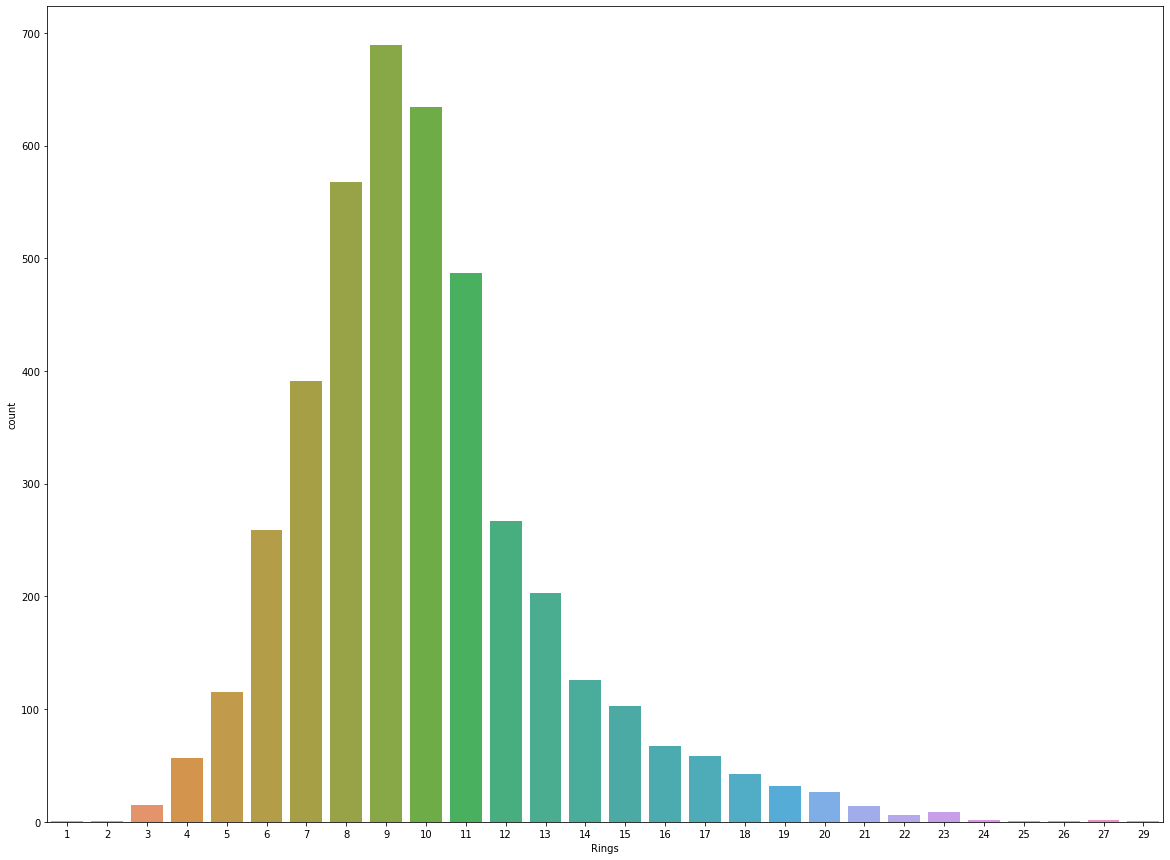

In [13]:
plt.figure(figsize=(20,15))  # lets plot countplot for label 'Ring'
sns.countplot(df['Rings'])

We use countplot visualization to see frequency of each class

0    1528
1    1342
2    1307
Name: Sex, dtype: int64

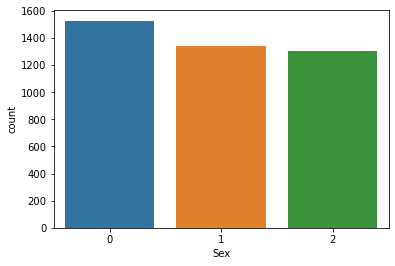

In [14]:
sns.countplot(df['Sex']) # lets plot countplot for categorical feature only
df['Sex'].value_counts()  # we get exact count of each class

0 shows counts for 'Male', 1 shows count for "infant" and 2 shows count for 'Female'.here we get exact count, which is shown in previous command

## Bivariate Analysis

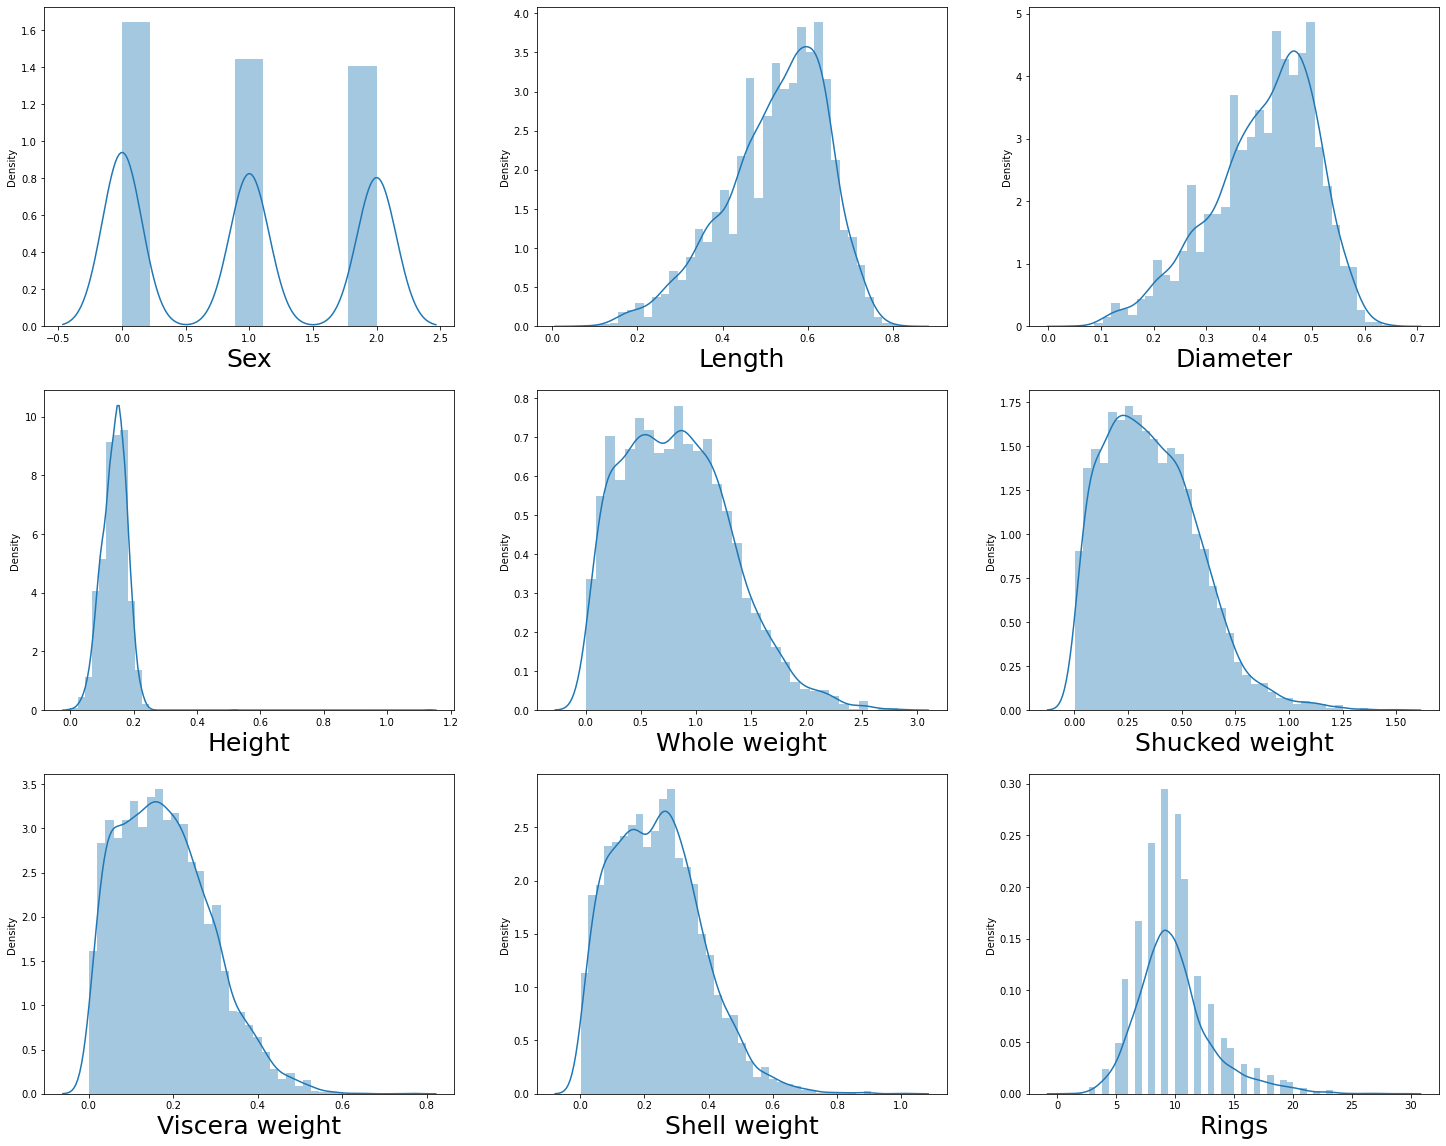

In [15]:
# lets plot distplot for every column
plt.figure(figsize=(25,20)) # 25 represnt row dimension and 20 represents column dimension
plotnumber=1  # initially plotnumber is set to1
for column in df:  # pass every column in for loop
    if plotnumber <=15:  # maximum value for plotnumber is set to 15, generallay it is equal to number of columns in dataframe
        plt.subplot(3,3,plotnumber)  # we draw,subplot in 3 rows and 3 columns
        ax=sns.distplot(df[column])  # draw distplot for each column
        plt.xlabel(column,fontsize=25)# assign label to x axis which is column name
    plotnumber+=1   # increment the plotnumber after every iteration
plt.show()  # display the plot
        

In above distplot visualization , feature "sex" has categorical data,thats why it shows distribution like this, so not to worry about it.
label 'Ring'has categorical
data ,therefore it shows some different nature.
the distplot of "length" and 'Diameter' shows left skewsness ,The distplot of 'Height' located in the extreme left part of grapth,but shows normal distribution curve,
The Distplot of 'Whole weight' ,'Shucked weight','Viscera weight' and 'Shell Weight' shows some right skewness inthe data

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

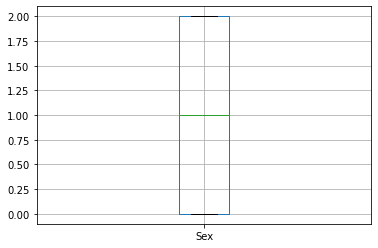

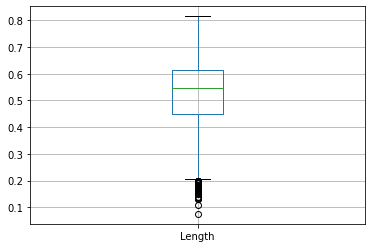

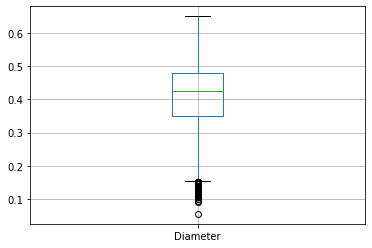

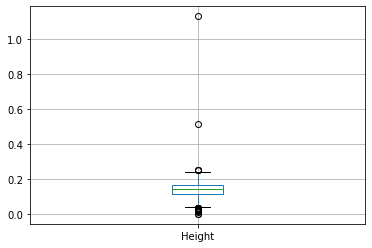

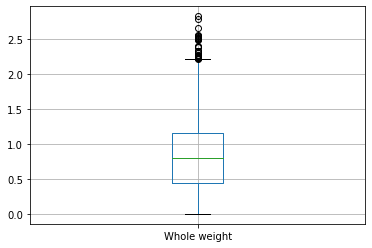

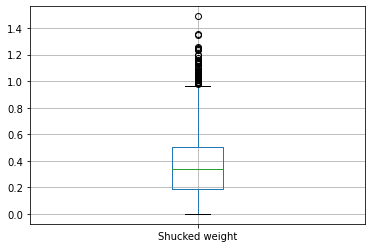

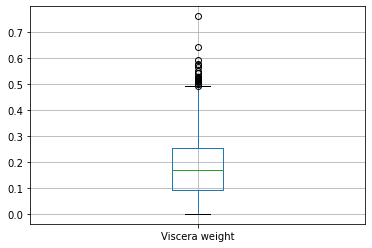

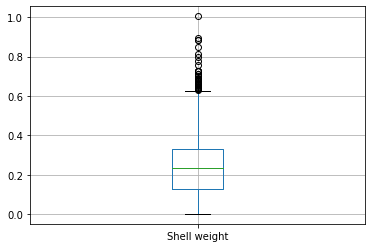

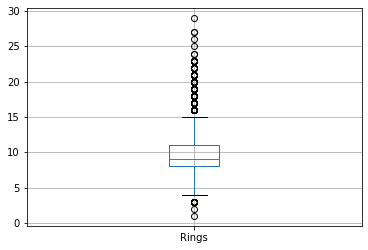

In [16]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in df:  # we pass every column to for loop
    plt.figure()   
    df.boxplot([column]) # box plot of every column is plotted
plt.show

feature 'sex' has categorical data so not worrried about its boxplot. feature " Length" and "Diameter" has outlier below first quartile.
boxplot of "Height" contains outliers below first quartile as well as above third quartile.'Whole weight','Shucked weight','Viscera weight' and 'Shell weight' has outliers above third quartle, "Ring' is our label,so we will not remove its outliers

In [17]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]  # z score with std deviation =3 cover almost 99.47 

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution

### Now we will again use BOX plot method to see any outlier removed from data using z score

<function matplotlib.pyplot.show(close=None, block=None)>

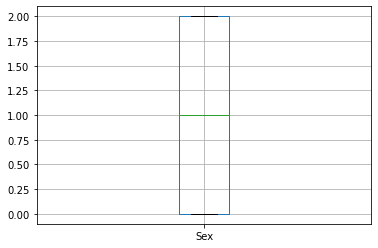

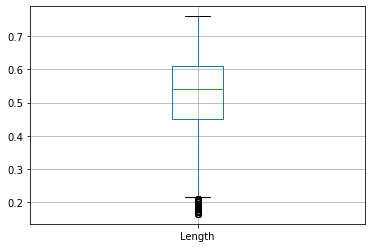

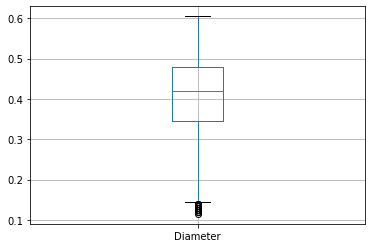

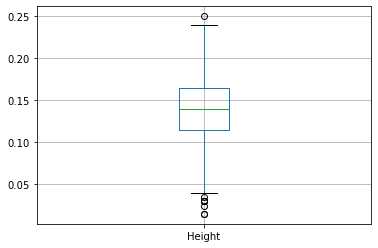

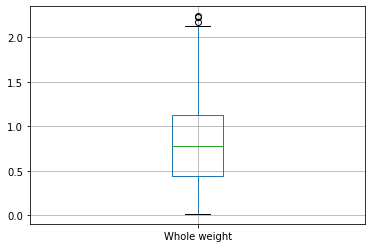

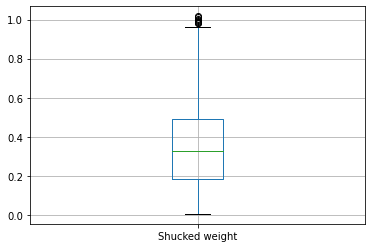

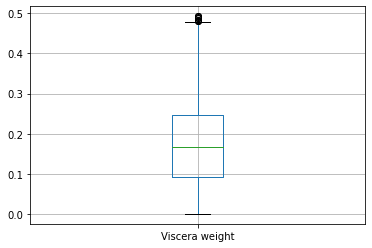

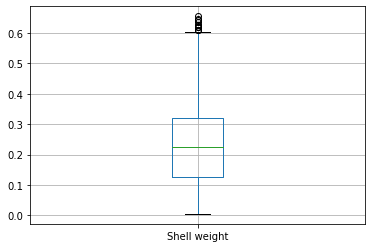

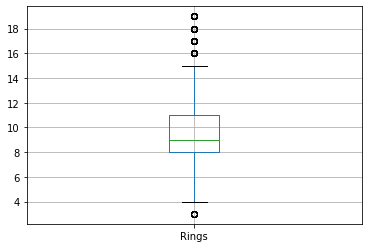

In [18]:
#lets draw the Box plot to indentify the outlier in the the dataframe
#now we will see any outlier present in our dataset using box plot
for column in new_df:  # we pass every column to for loop
    plt.figure()   
    new_df.boxplot([column]) # box plot of every column is plotted
plt.show

Here we can see that outliers below first quartile are present in feature 'Length','Diameter','Height'and label 'Rings', and outliers above third quartile are present in features 'Shell weight','Viscera weight','Shucked weight','whole weight','Height'

In [19]:
print(new_df.shape) # lets check shape of new dataframe
4027/4177

(4027, 9)


0.9640890591333493

we lost 4% data as well

by using z score method we remove some outliers, still some outliers are present in dataset,so we use Quantile method on new_df

In [20]:
q=new_df['Length'].quantile(0.85)# we are removing the bottom 1% data from column "Length"
new_df2=new_df[new_df['Length']>q]
q=new_df['Diameter'].quantile(0.90) # we are removing the bottom 1% data from column "Diameter"
new_df2=new_df[new_df['Diameter']>q]
q=new_df['Height'].quantile(0.90)# we are removing the bottom 2% data from column "Height"
new_df2=new_df[new_df['Height']>q]
q=new_df['Height'].quantile(0.99)# we are removing the top 2% data from column "Height"
new_df2=new_df[new_df['Height']<q]
q=new_df['Whole weight'].quantile(0.99)# we are removing the top 2% data from column "Whole weight"
new_df2=new_df[new_df['Whole weight']<q]
q=new_df['Shucked weight'].quantile(0.93)# we are removing the top 2% data from column "Shucked weight"
new_df2=new_df[new_df['Shucked weight']<q]
q=new_df['Viscera weight'].quantile(0.93)# we are removing the top 2% data from column "Viscera weight"
new_df2=new_df[new_df['Viscera weight']<q]
q=new_df['Shell weight'].quantile(0.97)# we are removing the top 2% data from column "Shell weight"
new_df2=new_df[new_df['Shell weight']<q]
q=new_df['Rings'].quantile(0.97)# we are removing the top 2% data from column "Rings"
new_df2=new_df[new_df['Rings']<q]

After using quantile method, we remove some outliers, so again we will use boxplot method to see how much outliers are presents in our dataset

<function matplotlib.pyplot.show(close=None, block=None)>

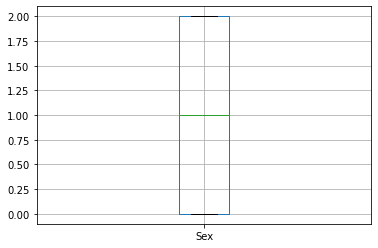

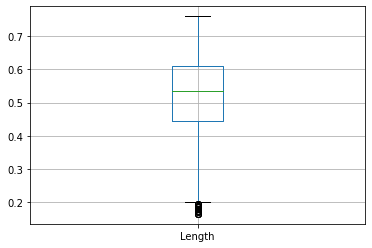

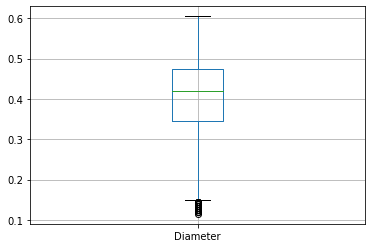

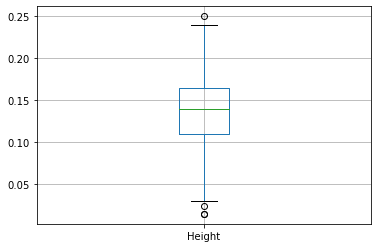

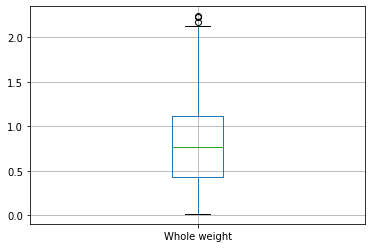

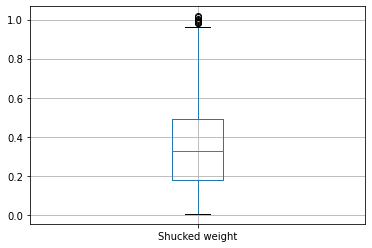

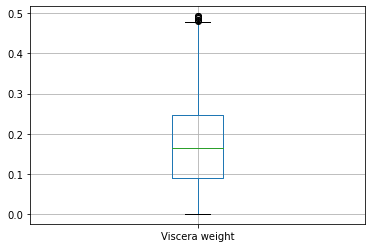

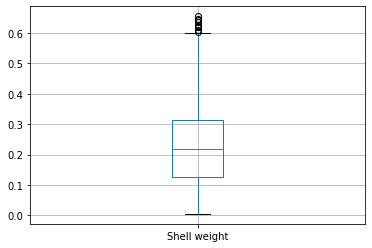

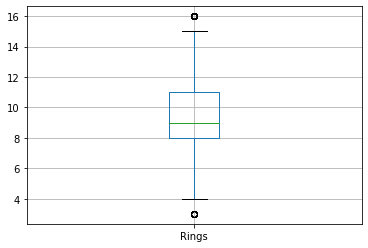

In [21]:
for column in new_df2:  # we pass every column to for loop
    plt.figure()   
    new_df2.boxplot([column]) # box plot of every column is plotted
plt.show

by using quantile method, we removed most of outliers, but still some outliers are there, lets deal with them

In [22]:
new_df2.shape

(3903, 9)

now we have 3903 rows and 9 columns

In [23]:
3903/4177

0.9344026813502514

we lost almost 7% data ,finally we use IQR method to remove some more outliers

In [24]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
q1=new_df.quantile(0.25)
# 3 rd Quartile
q3=new_df.quantile(0.75)
iqr=q3-q1
# Outlier detection formula
higher=q3+(1.5*iqr)  # uppar bound
lower=q1-(1.5*iqr)  # lower bound

q1 is the first quartile ,which contain 25% of data between q1 and minimum.q3 is the third quartile ,which contain 55% of data between q3 and minimum.iqr is the difference between q1 and q3.any datapoint below lower bound and above upper bound treated as outliers

In [25]:
df_1 = new_df2[~((new_df2 < (lower)) |(new_df2 > (higher))).any(axis=1)]

(new_df2 < (lower) its means outlier below lower are rejected,(new_df2 > (higher) it means outliers above higher are rejected by using bitwise or operator

In [26]:
df_1.shape

(3770, 9)

we have now 3770 rowsand 9 columns

In [27]:
3770/4177

0.9025616471151544

here we lost almost 9 to 10% of data, now we can not apply outlier detection any more,lets make final visualiszation outlier in our dataset

<function matplotlib.pyplot.show(close=None, block=None)>

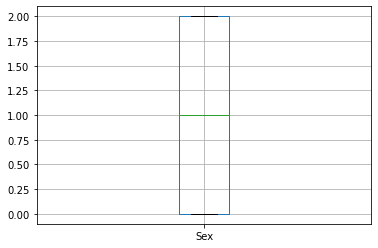

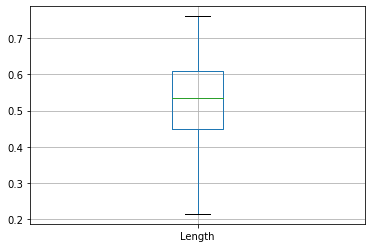

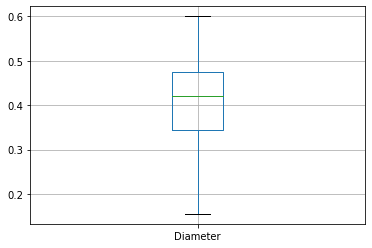

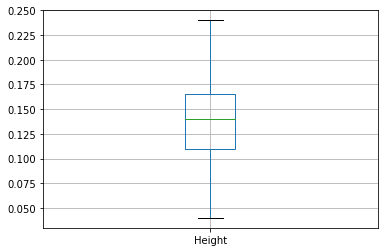

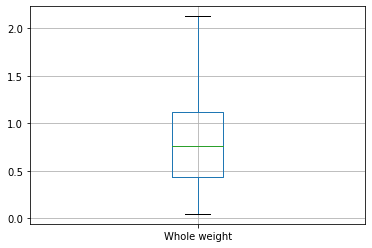

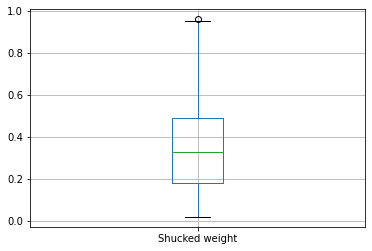

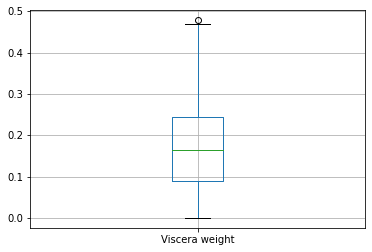

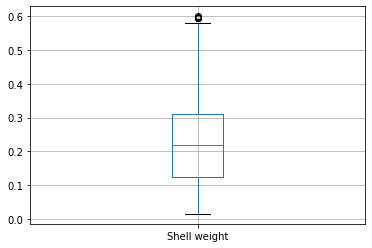

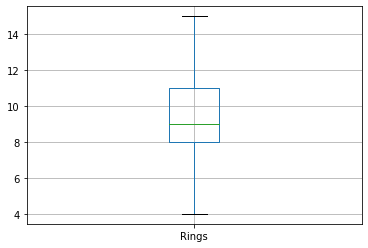

In [28]:
for column in df_1:  # we pass every column to for loop
    plt.figure()   
    df_1.boxplot([column]) # box plot of every column is plotted
plt.show

Still outliers are present in our dataset,we will not reduce data further more,we lost almost 9 to 10 % data, we should not reduce more than that

## Multivariate Analysis

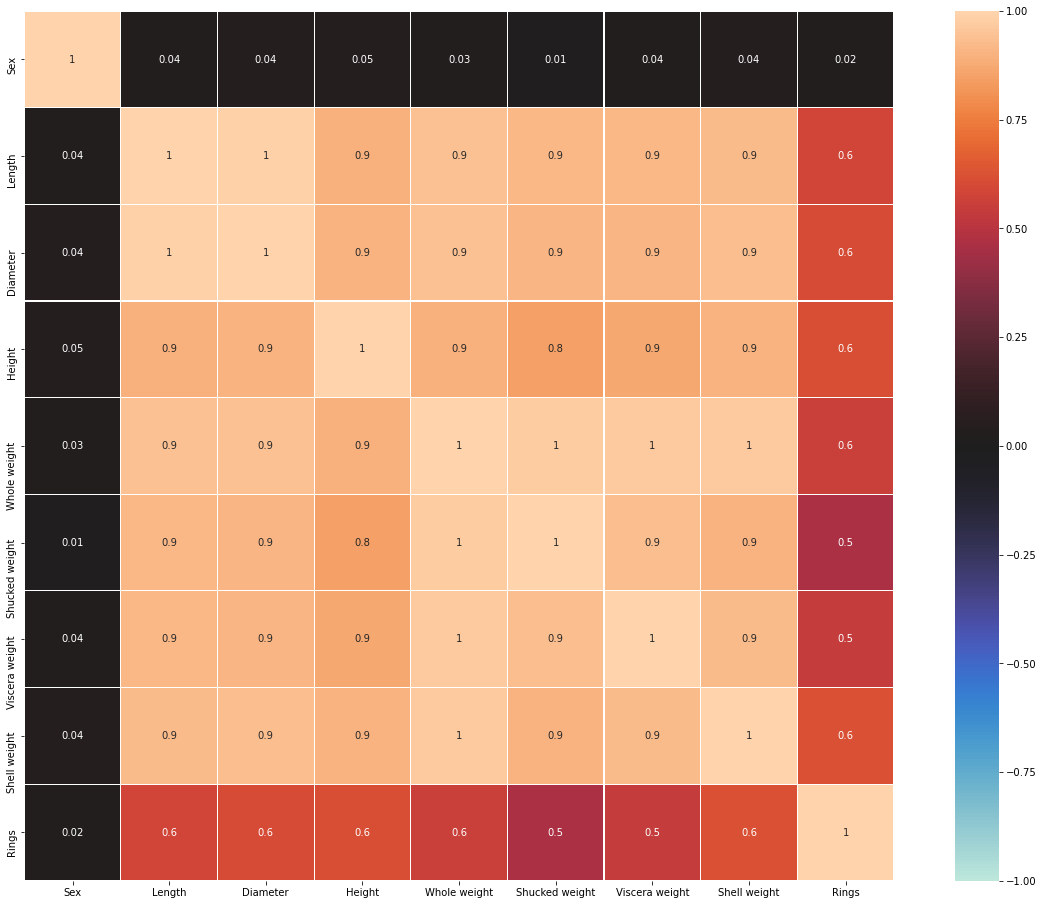

In [29]:

# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=df_1.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, correaltion between feature 'Sex' with other feature is very less, but we know that feature 'Sex' is categorical value, thats why we get less correation, we can not compare correlation between categorical and continous data. the value 0.9 shows highly correlation between 'Height' and 'Shell Weight', 'Shucked Weight' and 'Whole weight',correlation between 'height' and weight is also 0.9

In [30]:
corr_matrix=df.corr()   # here we get values of correlation in descending order
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.034627
Name: Rings, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable, in above correlation table "sex" value is near about 0, but 'sex' is categorical feature, so we will not worry about it

In [31]:
df_1.skew()

Sex               0.100431
Length           -0.494267
Diameter         -0.481283
Height           -0.152956
Whole weight      0.334317
Shucked weight    0.455009
Viscera weight    0.428194
Shell weight      0.320592
Rings             0.271929
dtype: float64

skewness range is + 0.5 to -0.5 anything between  this range is permissible and outside this range is high skewness,all values is in presribed range

In [32]:
# now separate the dataset into feature and label
x=df_1.drop(columns=['Rings'],axis=1)
y=df_1['Rings']

Now we separate features from target variable, x has all features and y has target variable

In [33]:
x  #display x  to see features only

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [34]:
y  # here we get only label or target column

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 3770, dtype: int64

In above commands ,we have already seen that our target variable is not balanced, without balancing it can not predict proper output, so we use imbalance technique 

In [35]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [36]:
from imblearn.over_sampling import SMOTE

SMOTE is synthetic minority oversampling Technique used to solve the problem of imbalancing.It randomly increases nminority class by replicating them and balances class distribution

In [37]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       15
1        7
2        9
3       10
4        7
        ..
8215    15
8216    15
8217    15
8218    15
8219    15
Name: Rings, Length: 8220, dtype: int64>

SMOTE perform oversampling all class to have same number of count as the class with most number of counts 

In [38]:
from imblearn.under_sampling import NearMiss
NR=NearMiss()  # assign NR to NearMiss
x,y=NR.fit_resample(x,y)  # now undersample the majority class and equals to minority class
y.value_counts()  # we get count of output y 

15    685
7     685
14    685
6     685
13    685
5     685
12    685
4     685
11    685
10    685
9     685
8     685
Name: Rings, dtype: int64

Near Miss is a undersampling Technique,instead of resampling,it will make majority class equals to minority class.to prevent information loss, we use Near Miss algorithm,lets check output y, all class in the output has same count or frequency,so we achive data balancing

In [39]:
# now  use standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.06608029, -1.79316424, -1.68236203, ..., -1.22982027,
        -1.30882052, -1.32102522],
       [ 0.06608029, -1.94100481, -1.94989166, ..., -1.31057493,
        -1.29955521, -1.39366095],
       [ 0.06608029, -1.79316424, -1.63777376, ..., -1.21794458,
        -1.21153478, -1.31376165],
       ...,
       [-1.22720538,  1.27452757,  1.39422878, ...,  2.05261936,
         1.50783311,  2.41971506],
       [-1.22720538, -0.49955926, -0.47847867, ..., -0.95430435,
        -0.91041227, -0.67819898],
       [ 0.06608029,  0.95724067,  0.94031929, ...,  0.75143182,
         0.82697504,  0.56096593]])

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy

In [75]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.5445255474452555 on Random state 127


Whatever number we gt as a random state is used by train test split in below code 

In [76]:
# now split data into training and testing phase
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=MaxRs)

now we bulid 4 models, namely,Decision Tree,K Neighbors ,Support vector and Random Forest,Here we can not use logistic regression beacause this multiclass problem & logistic regression is used for binary classification

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [78]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
pred1=DTC.predict(x_test)# predict output according test data
acc1=accuracy_score(y_test,pred1) #here we compared y_test with predicted output
print(acc1)

0.5489051094890511


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [79]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
pred2=KNC.predict(x_test)# predict output according test data
acc2=accuracy_score(y_test,pred2) #here we compared y_test with predicted output
print(acc2)

0.5639902676399027


KNN  store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors 

In [80]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
pred3=svc.predict(x_test) #predict output according test data
acc3=accuracy_score(y_test,pred3) #here we compared y_test with predicted output
print(acc3)

0.32895377128953773


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [81]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
pred4=RFC.predict(x_test) #predict label according test feature
acc4=accuracy_score(y_test,pred4)#here we compared test label with predicted label
print(acc4)

0.6632603406326034


It is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [82]:
# now we will do cross validation score
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [83]:
a=cross_val_score(DTC,x_scaled,y,cv=5).mean()  # here we pass Decision tree model along with scaled input and label, cv=5 is used for all
a  # saved our result to a

0.2888077858880779

In [84]:
b=cross_val_score(KNC,x_scaled,y,cv=5).mean()# here we pass Kneighbors model along with scaled input and label, cv=5 is used for all
b # saved our result to b

0.32007299270072986

In [85]:
c=cross_val_score(svc,x_scaled,y,cv=5).mean()# here we pass  support vector model along with scaled input and label, cv=5 is used for all
c

0.2608272506082725

In [86]:
d=cross_val_score(RFC,x_scaled,y,cv=5).mean()# here we pass Random Forest model along with scaled input and label, cv=5 is used for all
d

0.35085158150851586

now take difference of accuracy score and cv score ,we check difference for each model, the model whose difference is less,it means it is less overfitted, and treated as best model

In [87]:
DTC_diff=(acc1*100-a*100)
DTC_diff

26.00973236009733

In [88]:
KNC_diff=(acc2*100-b*100)
KNC_diff

24.39172749391728

In [89]:
svc_diff=(acc3*100-c*100)
svc_diff

6.812652068126525

In [90]:
RFC_diff=(acc4*100-d*100)
RFC_diff

31.240875912408754

We get less difference in Support Vector Classification model, so now we use hyperparameter tuning for best model i.e for Support Vector Classifier

In [91]:
import sklearn

In [92]:
print(sklearn.__version__)

0.23.2


In [95]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach whcu build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the  best parameter we can get best and authenticated accuracy which is not overfitted also

In [ ]:
parameters={'C':[1.0,2,3,4],
           'kernel':['linear','poly','rbf'],
           'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,1],
           'degree':[1,2,3]}


C=Regularization Parameter,the strength of regularization is inversely propotional to C
kernel=Specifies the kernel type to be used in algorithm
gamma=it gives the curvature .it means we can bend our hyperplane to cover datapoint and reduces errors.high values gives high curvature
degree=Degree of polynomial kernel function

Here we pass random Support Vector parameters, out of which gridsearchcv will return only best parameters

In [ ]:
GSC=GridSearchCV(SVC(),parameters,cv=5)
GSC.fit(x_train,y_train)
GSC.best_params_

now we will pass this best parameter to Support Vector Classifier

In [88]:
Final_model=SVC(C=1.0,kernel='poly',gamma=0.3,degree=2)
Final_model.fit(x_train,y_train)
final_pred=Final_model.predict(x_test)
final_acc=accuracy_score(y_test,final_pred)
print(final_acc*100)

51.53284671532846


In [ ]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

we get  best accuracy  using Random forest classifier.now we saved modelusing joblib

In [68]:
import joblib
joblib.dump(Final_model,"Abalone Case Study.pkl")

['Abalone Case Study.pkl']